In [1]:
import pandas as pd
import scipy.stats as st
import statistics as stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy
import math
%matplotlib inline
from scipy.stats import norm
from scipy.stats import binom

# Describtive statistics

In [2]:
# Importing the dataset for Ireland",
dataset = pd.read_csv("ppr-sample-2017-dublin.csv", encoding = 'utf-8')
dataset.head(5)

,Unnamed: 0,index,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,0,17458,20/12/2017,"129 Adamstown Way, Adamstown Square, Adamstown",NaN,Dublin,"246,696.03",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
1,1,5535,18/05/2017,"1 VICTORIA ST, DUBLIN 8, DUBLIN",Dublin 8,Dublin,"39,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,2,7792,06/07/2017,"10 EATON SQ, MONKSTOWN, DUBLIN",NaN,Dublin,"1,200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,3,5303,12/05/2017,"179 FOXFIELD GROVE, RAHENY, DUBLIN 5",Dublin 5,Dublin,"470,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,4,6807,16/06/2017,"10 APPLEWOOD GARDENS, APPLEWOOD VILLAGE, SWORDS",NaN,Dublin,"132,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [3]:
dataset=dataset.rename(columns={'Price ()':'Price'})

In [4]:
dataset.columns

Index(['Unnamed: 0', 'index', 'Date of Sale (dd/mm/yyyy)', 'Address',
       'Postal Code', 'County', 'Price', 'Not Full Market Price',
       'VAT Exclusive', 'Description of Property',
       'Property Size Description'],
      dtype='object')

In [5]:
dataset['Price']

0         246,696.03
1          39,000.00
2       1,200,000.00
3         470,000.00
4         132,500.00
            ...      
2995      240,000.00
2996      427,500.00
2997      414,098.00
2998      240,000.00
2999      292,000.00
Name: Price, Length: 3000, dtype: object

In [6]:
# Importing the dataset for france",
dataset1 = pd.read_csv("Housing_france.csv")
dataset1.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
dataset1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# Importing the dataset for UK",
dataset2= pd.read_csv("data_UK.csv")
dataset2.head(5)

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_uri
0,2DD2616C-5474-4C5E-80C8-F0E41F527CA5,41000,1996-05-03,B76 1LF,F,N,L,NaN,25,TRIDENT CLOSE,SUTTON COLDFIELD,SUTTON COLDFIELD,BIRMINGHAM,WEST MIDLANDS,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,99FD9C12-FB9D-42B3-AB86-61C05B8E7FAD,105000,1996-09-12,B92 8BF,D,Y,F,NaN,10,BURLISH AVENUE,SOLIHULL,SOLIHULL,SOLIHULL,WEST MIDLANDS,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,5EDD6EA6-7283-4CC3-8035-42A0AE104D21,47950,1996-08-30,BA22 8PU,T,Y,F,NaN,51,FOXGLOVE WAY,YEOVIL,YEOVIL,SOUTH SOMERSET,SOMERSET,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,2A289E9D-2AD0-CDC8-E050-A8C063054829,4000,1996-06-12,BB2 4JA,T,N,F,NaN,20,NUTTALL STREET,NaN,BLACKBURN,BLACKBURN WITH DARWEN,BLACKBURN WITH DARWEN,A,http://landregistry.data.gov.uk/data/ppi/trans...
4,3FD95C35-7C37-454E-809E-D7C585D1B1CF,87500,1996-12-16,BH2 5QZ,D,N,F,NaN,27,NORWICH ROAD,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [9]:
dataset2.describe()

,price_paid
count,100.000000
mean,72859.350000
std,55767.459497
min,4000.000000
25%,36837.500000
50%,53225.000000
75%,87500.000000
max,312500.000000


# normal distrubution

In [28]:
xbar_France = dataset1['price'].mean()
print(xbar_France)

4766729.247706422


In [29]:
sd_France= dataset1['price'].std()
print(sd_France)

1870439.615657394


In [12]:
x2= -0.00243 #x3 = (x-mu)/sigma standrization step, P(X<1)

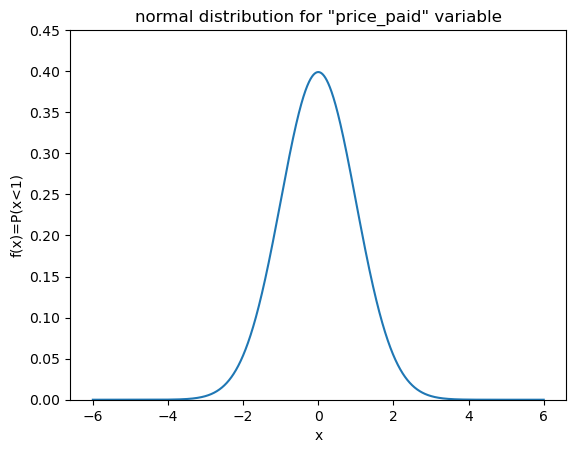

<Figure size 640x480 with 0 Axes>

In [13]:
%matplotlib inline
norm.pdf(x=x2, loc=xbar1, scale=sd1)
fig, ax = plt.subplots()
x= np.arange(-6,6,0.001)
ax.set_title('normal distribution for "price_paid" variable')
ax.set_xlabel('x')
ax.set_ylabel('f(x)=P(x<1)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()
norm.dist=plt.savefig('plot.png', dpi=500, bbox_inches='tight')

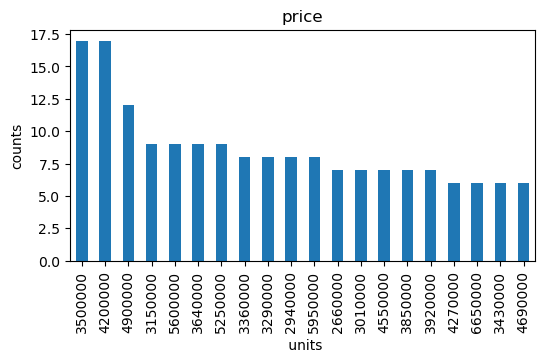

In [14]:
dataset1.price.value_counts().nlargest(20).plot(kind='bar', figsize=(6,3))
plt.title("price")
plt.ylabel("counts")

plt.xlabel(" units")
NumRes=plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [26]:
xbar_Uk = dataset2['price_paid'].mean()
print(xbar_Uk)

72859.35


In [27]:
sd_UK = dataset2['price_paid'].std()
print(sd_UK)

55767.45949668715


In [17]:
x3= -0.00943 #x3 = (x-mu)/sigma standrization step, P(X<1)

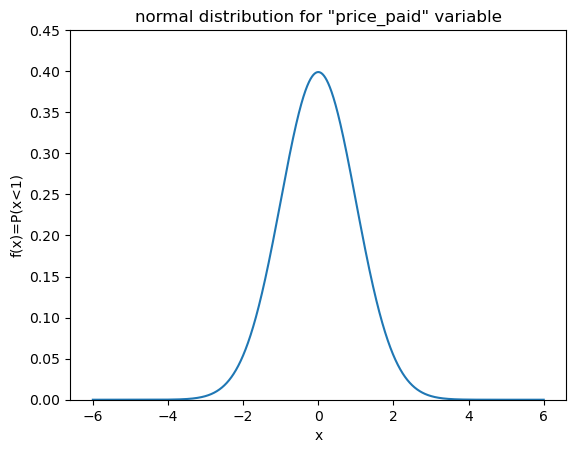

<Figure size 640x480 with 0 Axes>

In [18]:
%matplotlib inline
norm.pdf(x=x3, loc=xbar2, scale=sd2)
fig, ax = plt.subplots()
x= np.arange(-6,6,0.001)
ax.set_title('normal distribution for "price_paid" variable')
ax.set_xlabel('x')
ax.set_ylabel('f(x)=P(x<1)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()
norm.dist=plt.savefig('plot.png', dpi=500, bbox_inches='tight')

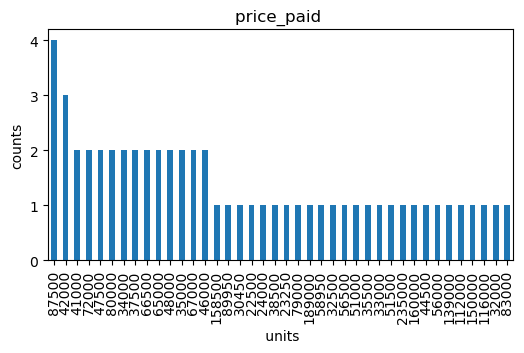

In [19]:
dataset2.price_paid.value_counts().nlargest(40).plot(kind='bar', figsize=(6,3))
plt.title("price_paid ")
plt.ylabel("counts")

plt.xlabel(" units")
NumRes=plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Infrential stats

the datasets are independent from each other.

# T-test

# Performing a t-test to compare  houses prices in Ireland and France:

In [20]:
dataset['Price'] = dataset['Price'].map(lambda x: x.lstrip('').rstrip('-+_').replace(',',''))

In [21]:
dataset['Price']=dataset['Price'].astype(float)

In [30]:
xbar_Ireland = dataset['Price'].mean()
print(xbar_Ireland)

421632.369733333


In [31]:
std_Ireland = dataset['Price'].std()
print(std_Ireland)

723300.211132891


-for dataset for prices in Ireland we pick a sample of n=10,  std =723300.21 , mean=421632.36  significance $\\$ level 95%
-for dataset for prices in France we pick a sample of n=12,  std =1870439.61 , mean=4766729  significance level 95% $\\$
- Substituting the critical values: the number of degrees of freedom = 20, and the alpha = 0.025 in the app to ge x= 2.423 $\\$
-The hypothsis are H0: the mean values for the tow populations are equal mu1 = mu2 $\\$
                   H1: the mean vlaues for the tow populations are different mu1 =! mu2 
$S\bar = 2.146098362×10¹²$ calculated form the formula: $ \frac{n_{1} S_{1}^{2}+n_{2}S_{2}^{2}}{(n_{2}+n_{2})}$, t claclualted form the app to be x = 2.423,then, to find t we use the formula : $\frac{(421632.36 -4766729)-(mu1-mu2)}{\sqrt{\frac{1}{10}+\frac{1}{12}*2.146098362×10¹²}} = −6.927139716$        
note: taking the H0 the term (mu1-mu2) = 0

We accept H0 if t < -2.423 or t > 2.423 $\\$
We reject H0 if  -2.423 <= t <= 2.423 $\\$
We found t < - 2.423 hence, we reject H0. The interpretaion there is enough evidence at 5% significance level to say that there are significant differences between prices of houses in France and Ireland.

# Performing a t-test to compare  houses prices in Ireland and UK:

-for dataset for prices in $\bf{Ireland}$ we pick a sample of n=10,  std =723300.21 , mean=421632.36  significance $\\$ level 95%
-for dataset for prices in $\bf{UK}$ we pick a sample of n=12,  std =55767.4594, mean=72859.35  significance level 95% $\\$
- Substituting the critical values: the number of degrees of freedom = 20, and the alpha = 0.025 in the app to ge x= 2.423 $\\$
-The hypothsis are H0: the mean values for the tow populations are equal mu1 = mu2 $\\$
                   H1: the mean vlaues for the tow populations are different mu1 =! mu2 
$S\bar = 5.268952052×10¹²$ calculated form the formula: $ \frac{n_{1} S_{1}^{2}+n_{2}S_{2}^{2}}{(n_{2}+n_{2})}$, t claclualted form the app to be x = 2.423,then, to find t we use the formula : $\frac{(421632.36 -4766729)-(mu1-mu2)}{\sqrt{\frac{1}{10}+\frac{1}{12}*2.146098362×10¹²}} = 982840.0393$       
note: taking the H0 the term (mu1-mu2) = 0

We accept H0 if t < -2.423 or t > 2.423 $\\$
We reject H0 if  -2.423 <= t <= 2.423 $\\$

We found $t > 2.423$ hence, we accept H0. The interpretaion there is enough evidence at 5% significance level to say that there are  no significant differences between prices of houses in UK and Ireland.

<Figure size 640x480 with 0 Axes>

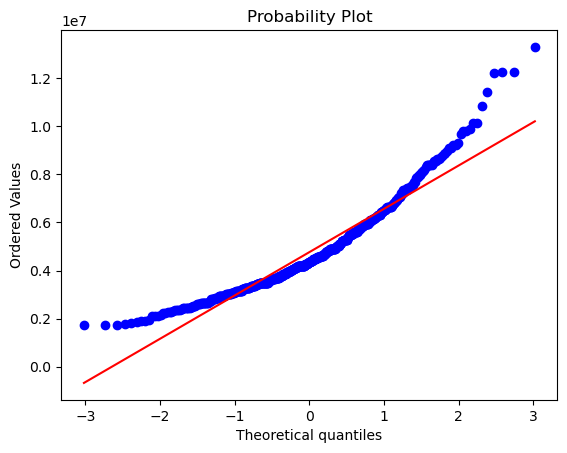

<Figure size 640x480 with 0 Axes>

In [47]:
#Normality plot. Our variable is "charges"

stats.probplot(dataset1.price, plot=plt)
plt.figure()

<Figure size 640x480 with 0 Axes>

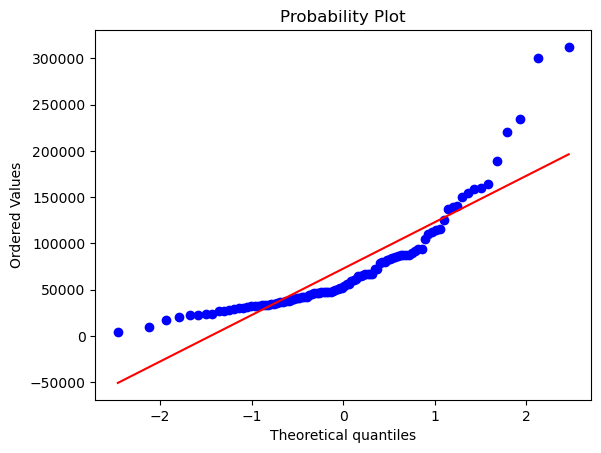

<Figure size 640x480 with 0 Axes>

In [48]:
stats.probplot(dataset2.price_paid, plot=plt)
plt.figure()

# Confidance interval

In [89]:
#create 95% confidence interval for population mean for prices in France.
st.t.interval(alpha=0.95, df=len(dataset1['price'])-1, loc=np.mean(dataset1['price']), scale=st.sem(dataset['price'])) 

/tmp/ipykernel_95483/2781001028.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(dataset['price'])-1, loc=np.mean(dataset['price']), scale=st.sem(dataset['price']))


(4609345.1502212, 4924113.345191644)

In [91]:
#create 95% confidence interval for population mean for prices in UK.
st.t.interval(alpha=0.95, df=len(dataset2['price_paid'])-1, loc=np.mean(dataset2['price_paid']), scale=st.sem(dataset2['price_paid'])) 

/tmp/ipykernel_95483/2378166645.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(dataset2['price_paid'])-1, loc=np.mean(dataset2['price_paid']), scale=st.sem(dataset2['price_paid']))


(61793.87615240995, 83924.82384759007)

# Shapiro test 

Shapiro test ://
H0: the data comes form normal distrubtion
H1: the data doesnt come form a normal distrubtion

In [50]:
#Shapiro wilk test

stats.shapiro(dataset1.price)

ShapiroResult(statistic=0.9216305613517761, pvalue=3.1544150171394466e-16)

 alpha is 0.05 and pvalue is 3.15 that means the data is normal distributed the null hypothesis is accepted.

In [51]:
stats.shapiro(dataset2.price_paid)

ShapiroResult(statistic=0.7911132574081421, pvalue=1.3329140569062758e-10)

 alpha is 0.05 and pvalue is 3.15 that means the data is normal distributed the null hypothesis is accepted.

Homogenity of the variances:
H0 = the variances between the contries are equal
H1= the variances between the contries are not equal


In [52]:
std11 = dataset1['price'].std

In [53]:
std22 = dataset2['price_paid'].std

In [54]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene


In [55]:
levene(dataset['price'], dataset2['price_paid'], center = 'mean')

LeveneResult(statistic=138.15614860505622, pvalue=4.9588098417380324e-29)

Pvalue is =4.9 which is greater than alpha i.e we accept the null hypothesis: the variance between the countries are equal.

In [63]:
#ONE-WAY ANOVA
model = ols('area~price', data = dataset1).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

             df        sum_sq       mean_sq           F        PR(>F)
price       1.0  7.360378e+08  7.360378e+08  218.884081  7.388225e-42
Residual  543.0  1.825937e+09  3.362683e+06         NaN           NaN


df(degrees of freedom) is 2-1 = 1, the pvlaue is  7.388 so we accept the null hyposthesis. 

# non parametric test

In [82]:
#ANOVA TWO WAYS
model2 = ols('price~area+parking', data = dataset1).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

             df        sum_sq       mean_sq           F        PR(>F)
area        1.0  5.467787e+14  5.467787e+14  232.691402  5.675360e-44
parking     1.0  8.283690e+13  8.283690e+13   35.252720  5.175349e-09
Residual  542.0  1.273593e+15  2.349802e+12         NaN           NaN


pvalue is > 0.05 alpha we accept the null hypothese

# U-mann test

U-mann test between france and Ireland because it works with tow pops and the nunit of measurment should be the same.

In [32]:
from scipy.stats import mannwhitneyu

In [33]:
mannwhitneyu(dataset['Price'],dataset1['price'])

MannwhitneyuResult(statistic=3098.5, pvalue=1.7135586226027644e-300)

The pvlaue is greater than 0.05 i.e we can accept the null hypothises that there is no difference bteween prices in Ireland and France. 